### Random forest

May 29, 2025

Lorena Lopez Dominguez

kernel: base (Python 3.12.8)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import os # to select directory

In [2]:
# Set working directory
base_dir = '/Users/Lore/Desktop/brainhack/project/BrainHack-Project-'
data_dir = os.path.join(base_dir, 'results')
os.chdir(base_dir) 

In [3]:
# import features data + metadata for all participants
featuredf = pd.read_table('results/all_features_and_metadata.csv', sep=',')

In [4]:
# check variables type
featuredf.dtypes

ID              object
AGE              int64
SEXm1f2          int64
subID           object
MHAM_16          int64
                ...   
ROI_416_WMZ    float64
ROI_417_WMZ    float64
ROI_418_WMZ    float64
ROI_419_WMZ    float64
ROI_420_WMZ    float64
Length: 1266, dtype: object

In [5]:
featuredf["SEXm1f2"].unique() # two classes 2, 1
featuredf["MHAM_16"].unique() # one class 1
featuredf["MHAM_85"].unique() # two classes 1, 0

array([1, 0])

In [6]:
# Select predictors (excluding the column we will use for classification)
# Exclude columns
columns_to_exclude = ['MHAM_16', 'ID', 'subID', 'MHAM_85']
predictors = featuredf.drop(columns=columns_to_exclude)
predictors

,AGE,SEXm1f2,ROI_1_PC,ROI_2_PC,ROI_3_PC,ROI_4_PC,ROI_5_PC,ROI_6_PC,ROI_7_PC,ROI_8_PC,...,ROI_411_WMZ,ROI_412_WMZ,ROI_413_WMZ,ROI_414_WMZ,ROI_415_WMZ,ROI_416_WMZ,ROI_417_WMZ,ROI_418_WMZ,ROI_419_WMZ,ROI_420_WMZ
0,55,2,0.853889,0.851251,0.834515,0.442245,0.447218,0.834993,0.837406,0.844638,...,0.733345,1.128622,0.983907,0.006201,-2.023348,-1.001533,0.528675,0.658040,1.004484,-1.625119
1,56,2,0.857745,0.854260,0.851038,0.849697,0.842091,0.795759,0.846449,0.842154,...,0.737977,0.403230,0.968062,1.268243,-1.383226,-0.629303,0.696450,0.295665,-1.342298,-0.049515
2,57,2,0.855267,0.854696,0.856450,0.856629,0.849042,0.855540,0.846583,0.851656,...,0.298294,-0.059490,0.762581,0.042037,-1.915825,0.676998,0.339826,0.287274,0.146074,-0.694731
3,23,1,0.860953,0.860330,0.858415,0.844592,0.847162,0.859631,0.785963,0.857876,...,-0.049603,1.014534,1.067931,-0.129021,-2.367483,-0.444530,1.437098,0.751130,0.255546,-0.599228
4,21,1,0.861060,0.859584,0.859170,0.854307,0.851397,0.854168,0.799545,0.850432,...,0.617808,1.078913,-1.100800,0.250356,0.219861,0.802597,-0.113474,0.937473,0.113263,-0.323651
5,22,1,0.858055,0.858179,0.858144,0.857525,0.855517,0.855138,0.856936,0.854850,...,0.734616,0.386672,1.625113,-1.235900,0.892166,0.655814,1.122529,-0.131031,-1.047038,-1.853547
6,60,2,0.855942,0.852346,0.832465,0.848820,0.854149,0.858296,0.797298,0.857851,...,0.562934,-0.051570,0.585447,1.005820,-0.262486,0.686666,0.713356,0.217558,-1.392503,-2.131971
7,61,2,0.861164,0.832084,0.766958,0.842500,0.855925,0.833690,0.862283,0.845534,...,0.278401,1.198402,1.117334,-0.425323,-1.199482,-0.898148,0.961299,-0.073216,-0.899992,-0.459123
8,61,2,0.853679,0.856073,0.857238,0.851026,0.855748,0.856789,0.830411,0.854530,...,0.505863,-0.139883,1.254389,0.973886,-1.107997,0.600575,0.717309,-0.308227,-2.224719,-0.469842
9,39,2,0.857187,0.855368,0.856934,0.856718,0.858968,0.857987,0.857073,0.856881,...,0.416545,0.456437,1.268036,0.899043,-1.748457,0.164735,0.682323,0.507721,0.239542,-1.464483


In [7]:
# Standardize the predictors
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset and create a new DataFrame with scaled features
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Display the head of the standardized predictors
print(predictors_standardized.head())

        AGE   SEXm1f2  ROI_1_PC  ROI_2_PC  ROI_3_PC  ROI_4_PC  ROI_5_PC  \
0  0.936364  0.534522 -0.482896  0.024169 -0.165402 -6.690197 -3.515943   
1  1.009433  0.534522  0.202479  0.222374  0.116192  0.147579  0.166253   
2  1.082501  0.534522 -0.237945  0.251086  0.208438  0.263901  0.231072   
3 -1.401839 -1.870829  0.772571  0.622137  0.241918  0.061907  0.213543   
4 -1.547977 -1.870829  0.791645  0.573024  0.254785  0.224945  0.253037   

   ROI_6_PC  ROI_7_PC  ROI_8_PC  ...  ROI_411_WMZ  ROI_412_WMZ  ROI_413_WMZ  \
0 -0.174459  0.140238 -0.566791  ...     1.295101     1.054632    -0.013319   
1 -1.144022  0.150296 -0.858077  ...     1.300050     0.032958    -0.038730   
2  0.333290  0.150445  0.256310  ...     0.830354    -0.618757    -0.368256   
3  0.434409  0.083022  0.985954  ...     0.458711     0.893945     0.121428   
4  0.299388  0.098127  0.112798  ...     1.171677     0.984620    -3.356529   

   ROI_414_WMZ  ROI_415_WMZ  ROI_416_WMZ  ROI_417_WMZ  ROI_418_WMZ  \
0   

In [9]:
# Split the dataset
X = predictors_standardized
y = featuredf[['MHAM_85']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# Step 2: Train a Random Forest Model (Before Feature Selection)
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy_before = rf.score(X_test, y_test)
print(f'Accuracy before feature selection: {accuracy_before:.2f}')

/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy before feature selection: 0.71


In [11]:
# Step 3: Perform Feature Selection Using Random Forest
# Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Select top N features (example selecting top 10 features)
top_features = feature_importance_df['Feature'][:20].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

          Feature  Importance
1104  ROI_263_WMZ    0.017657
1066  ROI_225_WMZ    0.012533
959   ROI_118_WMZ    0.010746
1048  ROI_207_WMZ    0.010238
338    ROI_337_PC    0.009966
...           ...         ...
1         SEXm1f2    0.000000
0             AGE    0.000000
16      ROI_15_PC    0.000000
15      ROI_14_PC    0.000000
310    ROI_309_PC    0.000000

[1262 rows x 2 columns]


In [12]:
# Step 4: Train a Random Forest Model (After Feature Selection)
# Train the Random Forest model with selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate the model
accuracy_after = rf_selected.score(X_test_selected, y_test)
print(f'Accuracy after feature selection: {accuracy_after:.2f}')

/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy after feature selection: 0.71


n_estimators=100 gave Accuracy after feature selection: from 0.71 to 0.71


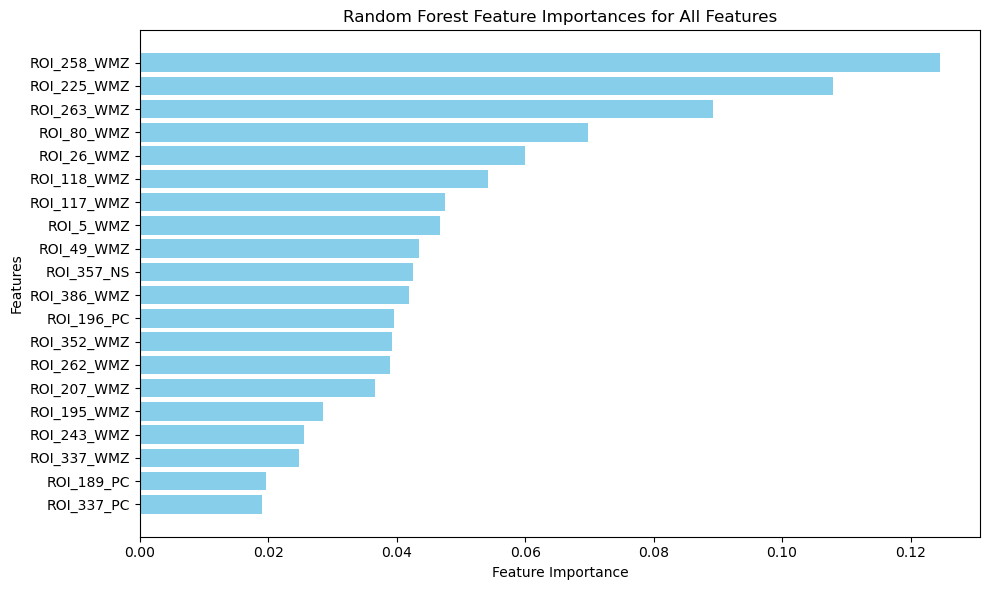

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a list of selected feature names
# Replace this with your actual list
selected_feature_names = X_train_selected.columns if isinstance(X_train_selected, pd.DataFrame) else [f'Feature_{i}' for i in range(X_train_selected.shape[1])]

# Get feature importances
importances = rf_selected.feature_importances_

# Create a DataFrame for easy plotting
feat_importances = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': importances
})

# Sort by importance
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances for All Features')
plt.gca().invert_yaxis()  # Most important at the top
plt.tight_layout()
plt.savefig(os.path.join(base_dir, 'results/rf_features_all.png'))
